# Grover's Search Algorithm

Grover's algorithm is arguably one of the canonical quantum algorithms that kick-started the field of quantum computing. In the future, it could possibly serve as a hallmark application of quantum computing. Grover's algorithm allows us to find a particular register in an unordered database with $N$ entries in just $O(\sqrt{N})$ steps, compared to the best classical algorithm taking on average $N/2$ steps, thereby providing a __quadratic speedup__. For large databases (with a large number of entries, $N$), a quadratic speedup can provide a significant advantage. For a database with one million entries, a quantum computer running Grover's algorithm would need about 1000 runs, while a classical computer would need, on average, $500,000$ runs.

In this notebook, we implement Gover's algorithm based on ion-trap experiments [1]. In particular, we implement the phase oracle (see Figure 1d and 1e of this paper). For a compherensive description of the algorithm see Chapter 6 of [2].

---
# References <a name="ref"></a>

[1] C. Figgatt, D. Maslov, K. A. Landsman, N. M. Linke, S. Debnath & C. Monroe (2017), "Complete 3-Qubit Grover search on a programmable quantum computer", Nature Communications, Vol 8, Art 1918, doi:10.1038/s41467-017-01904-7, arXiv:1703.10535.

[2] Nielsen, Michael A., Chuang, Isaac L. (2010). Quantum Computation and Quantum Information (2nd ed.). Cambridge: Cambridge University Press.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from braket.aws import AwsDevice
from braket.circuits import Circuit
from braket.devices import LocalSimulator
from braket.tracking import Tracker

from braket.experimental.algorithms.grover_search.grover_search import (
    grover_search,
    get_oracles,
    plot_bitstrings,
)

In [2]:
oracles = get_oracles()
circuit = grover_search("000", oracles)
print(circuit)

T  : |0|1|2|3|4|5 |6|7|8|9 |10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|Result Types|
                                                                                                        
q0 : -H-X----------C--------C--C--T--C--X--H--X--------------C-----------C--C--T--C--X--H--Probability--
                   |        |  |     |                       |           |  |     |        |            
q1 : -H-X-----C----|---C-T--|--X--Ti-X--X--H--X--------C-----|-----C--T--|--X--Ti-X--X--H--Probability--
              |    |   |    |                          |     |     |     |                 |            
q2 : -H-X-H-H-X-Ti-X-T-X-Ti-X--T--H--H--X--H--X--H--H--X--Ti-X--T--X--Ti-X--T--H--H--X--H--Probability--

T  : |0|1|2|3|4|5 |6|7|8|9 |10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|Result Types|


# Run on a local simulator
We demonstrate Grover's algorithm on a classical simulator first. You can choose between a local simulator or an on-demand simulator.

In [3]:
local_simulator = LocalSimulator()

In [4]:
task = local_simulator.run(circuit, shots=100)
print(task)

LocalQuantumTask('id':32dd5e58-f68f-40fb-aa22-b75cda5a22d7)


In [5]:
result = task.result()
print(result.measurement_probabilities)

{'000': 0.78, '001': 0.04, '100': 0.03, '011': 0.03, '101': 0.04, '110': 0.03, '111': 0.02, '010': 0.03}


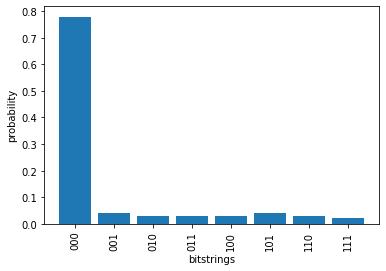

In [6]:
plot_bitstrings(result)

# Run on a QPU

Now we run on IonQ.

In [9]:
ionq = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")

In [10]:
from braket.tracking import Tracker

tracker = Tracker()

In [11]:
qpu_task = ionq.run(circuit, shots=1000)

In [12]:
qpu_result = qpu_task.result()
print(qpu_result.measurement_probabilities)

In [ ]:
from grovers import plot_bitstrings

plot_bitstrings(qpu_result)

In [ ]:
print(f"Total QPU cost was: {tracker.qpu_tasks_cost()}")
print("Task Summary")
print(tracker.quantum_tasks_statistics())
print(
    f"Estimated cost to run this example: {tracker.qpu_tasks_cost() + tracker.simulator_tasks_cost():.2f} USD"
)

Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).